# Split dataset in training and test

https://github.com/codificandobits/prediction_de_acciones_en_la_bolsa_con_redes_LSTM

Training len: 276353
Test len: 118440


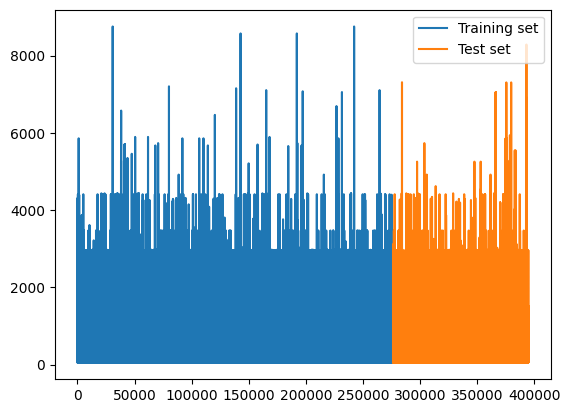

In [1]:

import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

# Data read
dataset = pd.read_csv('20190105_clean.csv')
dataset.head()

training_percentatge = 0.7 # You could decide the percentatge for training (70%).
dataset_len = len(dataset)
training_len  = int(np.floor(dataset_len*0.7))
test_len = dataset_len - training_len

training_set = dataset[0:training_len].iloc[:,1:2]
print("Training len: {}".format(len(training_set)))

# We create a test set to compare it with the predicted values.
test_set = dataset[training_len - 2:training_len + test_len].iloc[:,1:2]
print("Test len: {}".format(len(test_set)))

training_set['B'].plot(legend=True)
test_set['B'].plot(legend=True)
plt.legend(['Training set', 'Test set'])
plt.show()


# Creating the model

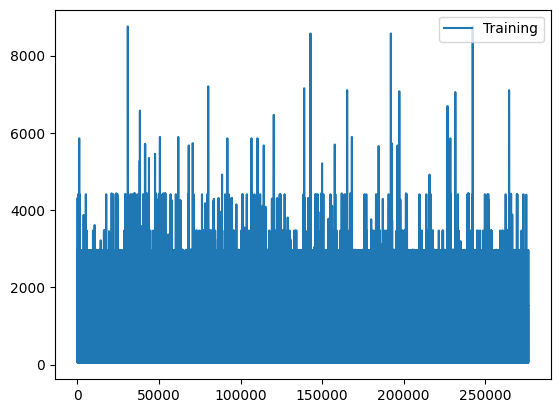

Epoch 1/20
13818/13818 [==============================] - 64s 4ms/step - loss: 0.0072
Epoch 2/20
13818/13818 [==============================] - 46s 3ms/step - loss: 0.0071
Epoch 3/20
13818/13818 [==============================] - 34s 2ms/step - loss: 0.0071
Epoch 4/20
13818/13818 [==============================] - 36s 3ms/step - loss: 0.0071
Epoch 5/20
13818/13818 [==============================] - 27s 2ms/step - loss: 0.0071
Epoch 6/20
13818/13818 [==============================] - 357s 26ms/step - loss: 0.0071
Epoch 7/20
13818/13818 [==============================] - 41s 3ms/step - loss: 0.0071
Epoch 8/20
13818/13818 [==============================] - 58s 4ms/step - loss: 0.0071
Epoch 9/20
13818/13818 [==============================] - 60s 4ms/step - loss: 0.0071
Epoch 10/20
13818/13818 [==============================] - 64s 5ms/step - loss: 0.0071
Epoch 11/20
13818/13818 [==============================] - 56s 4ms/step - loss: 0.0071
Epoch 12/20
13818/13818 [=========================

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


training_set['B'].plot(legend=True)
plt.legend(['Training'])
plt.show()

# training_set normalisation 
sc = MinMaxScaler(feature_range=(0,1))
scalar_training_set = sc.fit_transform(training_set)

time_step = 2 #Number of consecutive data
X_train = []
Y_train = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: blocks of "time_step" values: 0-time_step, 1-time_step+1, 2-time_step+2...
    X_train.append(scalar_training_set[i-time_step:i,0])

    # Y: next value
    Y_train.append(scalar_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train (for Keras)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# LSTM
dim_in = (X_train.shape[1],1)
dim_out = 1
na = 10

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in))
model.add(Dense(units=dim_out))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train,Y_train,epochs=20,batch_size=20)

# Validation

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3702/3702 [==============================] - 6s 2ms/step


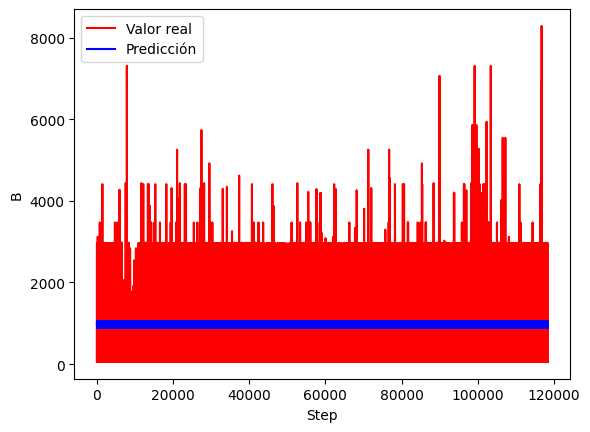

In [5]:
#
# Auxiliar functions.
#
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    # plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Step')
    plt.ylabel('B')
    plt.legend()
    plt.show()

#
# Validation.
#
x_test = test_set.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = model.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

print(prediccion)

# Graficar resultados
graficar_predicciones(test_set.values,prediccion)